In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from skimage import transform as tf
import numpy as np
import math

In [2]:
corners = {'up_left': ['48', '55'], 'down_left': ['23', '337'], 'up_right': ['322', '45'], 'down_right': ['341', '341'], 'image': '/tmp/c4fb3309-938f-49cc-a34c-1b82b10e1c59.jpeg', 'image_shape': [369, 366]}
image_path = './DLMIA.png'
image = imread(image_path, as_gray=True)

Given the cordenates it should be able to transform the the given picture into a nice square of 300x300

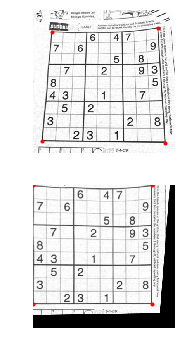

In [18]:
image_shape = tuple(corners['image_shape'])
image_resize = resize(image, image_shape, mode='symmetric', preserve_range=True)


# Given that the new shape will be 300 by 300 this is the given points
src = np.array([[0, 0], [0, 306], [306, 306], [306, 0]])


corners['up_left'] = [float(x) for x in corners['up_left']]
corners['down_left'] = [float(x) for x in corners['down_left']]
corners['up_right'] = [float(x) for x in corners['up_right']]
corners['down_right'] = [float(x) for x in corners['down_right']]


dst = np.array([corners['up_left'], corners['down_left'], corners['down_right'], corners['up_right']])

tform3 = tf.ProjectiveTransform()
tform3.estimate(src, dst)
warped = tf.warp(image_resize, tform3, output_shape=image_shape)

fig, ax = plt.subplots(nrows=2, figsize=(8, 5))

ax[0].imshow(image_resize, cmap=plt.cm.gray)
ax[0].plot(dst[:, 0], dst[:, 1], '.r')
ax[1].imshow(warped, cmap=plt.cm.gray)
ax[1].plot(src[:, 0], src[:, 1], '.r')

for a in ax:
    a.axis('off')

plt.tight_layout()

plt.show()

(306, 306)

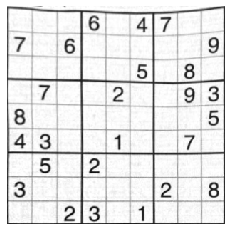

In [23]:
new_image = warped[0:306, 0:306]

fig, ax = plt.subplots()

plt.axis("off")
ax.set_yticklabels([])
ax.set_xticklabels([])

ax.imshow(new_image, cmap=plt.cm.gray)


fig.savefig('warped.jpeg', format="jpeg", bbox_inches="tight", pad_inches=0)


The use of 299 insted of 300 is due to the fact that using the 300 number will force matplotlib to create some pading

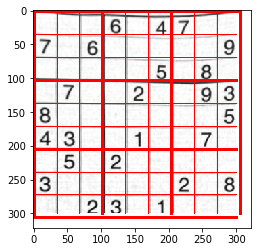

In [16]:
plt.imshow(new_image , cmap=plt.cm.gray)
divisor = 306
color = '#FF0000'
for i in range(9):
    x = (divisor /9)*(i+1)
    y1 = 0
    y2 = 299
    linewidth = int((i+1) % 3 == 0)*3 or 1;
    plt.plot([x, x], [y1, y2], '-', linewidth=linewidth, color=color)
    plt.plot([y1, y2], [x, x], '-', linewidth=linewidth, color=color)
plt.plot([0, 0], [0, divisor], '-', linewidth=3, color=color)
plt.plot([0, divisor], [0, 0], '-', linewidth=3, color=color)

33.333333333333336